**Housing Data Analysis Using PySpark(Mini Project)**

**Dataset Link :** https://www.kaggle.com/datasets/harishkumardatalab/housing-price-prediction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from difflib import get_close_matches
import warnings
warnings.filterwarnings("ignore")

Import the pandas library for data manipulation, matplotlib.pyplot and seaborn for data visualization, get_close_matches from difflib for finding similar strings, and warnings to control warning messages.

In [2]:
df = pd.read_csv("Housing.csv")

Read the CSV file "Housing.csv" into a Pandas DataFrame named df for data analysis and manipulation.

In [3]:
df.columns = df.columns.str.strip().str.lower()

Convert all column names in the DataFrame df to lowercase and remove any leading or trailing spaces for consistent and clean column naming.

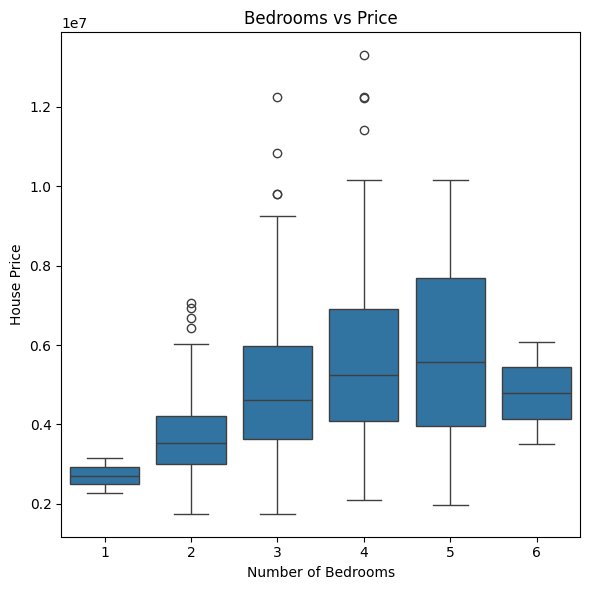

In [4]:
plt.figure(figsize=(6,6))
sns.boxplot(x="bedrooms", y="price", data=df)
plt.title("Bedrooms vs Price")
plt.xlabel("Number of Bedrooms")
plt.ylabel("House Price")
plt.tight_layout()
plt.show()

boxplot showing the distribution of house prices (price) for each number of bedrooms (bedrooms) in df, with labeled axes and a title, and display it neatly using tight_layout().

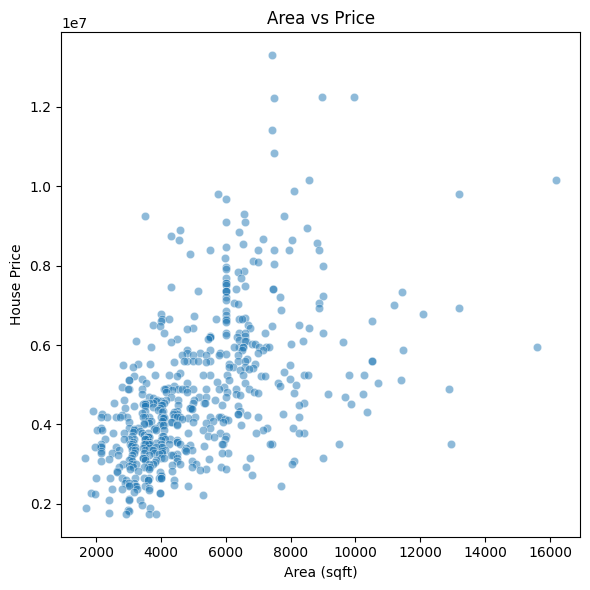

In [5]:
plt.figure(figsize=(6,6))
sns.scatterplot(x="area", y="price", data=df, alpha=0.5)
plt.title("Area vs Price")
plt.xlabel("Area (sqft)")
plt.ylabel("House Price")
plt.tight_layout()
plt.show()

scatter plot showing the relationship between house area (area) and price (price) in df, with semi-transparent points (alpha=0.5), labeled axes, a title, and a neatly arranged layout.

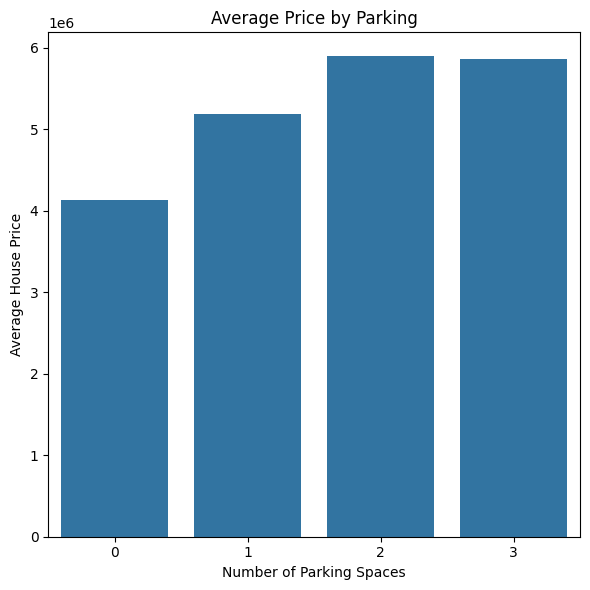

In [6]:
plt.figure(figsize=(6,6))
sns.barplot(x="parking", y="price", data=df, estimator="mean", ci=None)
plt.title("Average Price by Parking")
plt.xlabel("Number of Parking Spaces")
plt.ylabel("Average House Price")
plt.tight_layout()
plt.show()

bar plot showing the average house price (price) for each number of parking spaces (parking) in df, with labeled axes, a title, and a clean layout.

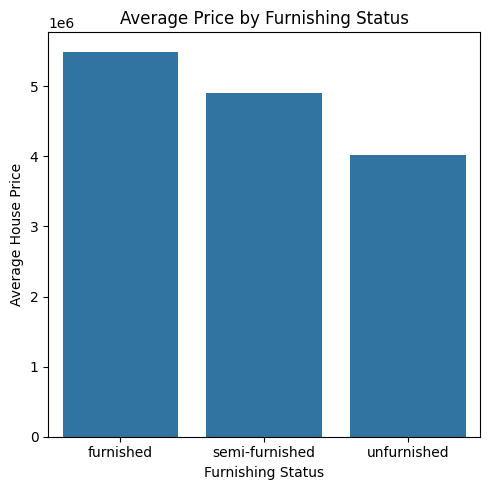

In [7]:
plt.figure(figsize=(5,5))
sns.barplot(x="furnishingstatus", y="price", data=df, estimator="mean", ci=None)
plt.title("Average Price by Furnishing Status")
plt.xlabel("Furnishing Status")
plt.ylabel("Average House Price")
plt.tight_layout()
plt.show()

bar plot showing the average house price (price) for each furnishing status (furnishingstatus) in df, with labeled axes, a title, and a neatly arranged layout.

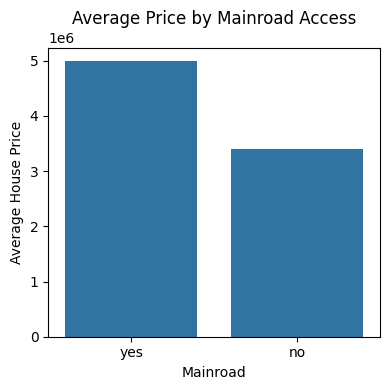

In [8]:
plt.figure(figsize=(4,4))
sns.barplot(x="mainroad", y="price", data=df, estimator="mean", ci=None)
plt.title("Average Price by Mainroad Access")
plt.xlabel("Mainroad")
plt.ylabel("Average House Price")
plt.tight_layout()
plt.show()

bar plot showing the average house price (price) based on whether the house has mainroad access (mainroad) in df, with labeled axes, a title, and a clean layout.

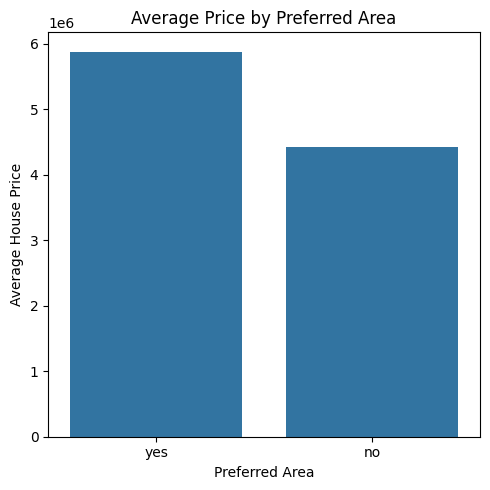

In [9]:
plt.figure(figsize=(5,5))
sns.barplot(x="prefarea", y="price", data=df, estimator="mean", ci=None)
plt.title("Average Price by Preferred Area")
plt.xlabel("Preferred Area")
plt.ylabel("Average House Price")
plt.tight_layout()
plt.show()

bar plot showing the average house price (price) for houses in preferred areas (prefarea) in df, with labeled axes, a title, and a neatly arranged layout.

In [10]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg, min, max, count

import the SparkSession class to create a Spark environment for data processing, and import functions col, avg, and round to select DataFrame columns, calculate averages, and round numerical values.

In [11]:
spark = SparkSession.builder.appName("HousingDataAnalysis").getOrCreate()

SparkSession named spark with the application name "HousingDataAnalysis" to initialize a Spark environment for data processing.

In [12]:
input_path = "Housing.csv"
df = spark.read.csv(input_path, header=True, inferSchema=True)

Read the CSV file "Housing.csv" into a Spark DataFrame df with headers and automatically inferred data types for each column.

In [13]:
total_houses = df.count()
print("Total number of houses:", total_houses)

Total number of houses: 545


Count the total number of rows (houses) in the Spark DataFrame df and print the result.

In [14]:
categorical_columns = ["bedrooms", "stories", "mainroad", "guestroom", "basement",
                       "hotwaterheating", "airconditioning", "parking", "prefarea", "furnishingstatus"]

for col_name in categorical_columns:
    distinct_count = df.select(col_name).distinct().count()
    print(f"Distinct values in '{col_name}': {distinct_count}")

Distinct values in 'bedrooms': 6
Distinct values in 'stories': 4
Distinct values in 'mainroad': 2
Distinct values in 'guestroom': 2
Distinct values in 'basement': 2
Distinct values in 'hotwaterheating': 2
Distinct values in 'airconditioning': 2
Distinct values in 'parking': 4
Distinct values in 'prefarea': 2
Distinct values in 'furnishingstatus': 3


For each categorical column in categorical_columns, count and print the number of distinct values in the Spark DataFrame.

In [15]:
for col_name in categorical_columns:
    print(f"\nDistribution of houses by {col_name}:")
    df.groupBy(col_name).count().orderBy(col_name).show()


Distribution of houses by bedrooms:
+--------+-----+
|bedrooms|count|
+--------+-----+
|       1|    2|
|       2|  136|
|       3|  300|
|       4|   95|
|       5|   10|
|       6|    2|
+--------+-----+


Distribution of houses by stories:
+-------+-----+
|stories|count|
+-------+-----+
|      1|  227|
|      2|  238|
|      3|   39|
|      4|   41|
+-------+-----+


Distribution of houses by mainroad:
+--------+-----+
|mainroad|count|
+--------+-----+
|      no|   77|
|     yes|  468|
+--------+-----+


Distribution of houses by guestroom:
+---------+-----+
|guestroom|count|
+---------+-----+
|       no|  448|
|      yes|   97|
+---------+-----+


Distribution of houses by basement:
+--------+-----+
|basement|count|
+--------+-----+
|      no|  354|
|     yes|  191|
+--------+-----+


Distribution of houses by hotwaterheating:
+---------------+-----+
|hotwaterheating|count|
+---------------+-----+
|             no|  520|
|            yes|   25|
+---------------+-----+


Distributi

For each categorical column in categorical_columns, display the distribution of houses by counting rows per category, ordered by the column values, in the Spark DataFrame.

In [16]:
price_stats = df.agg(min("price").alias("min_price"),
                     max("price").alias("max_price")).collect()[0]
print("\nMinimum house price:", price_stats["min_price"])
print("Maximum house price:", price_stats["max_price"])


Minimum house price: 1750000
Maximum house price: 13300000


Compute and print the minimum and maximum house prices in the Spark DataFrame df using aggregation functions.

In [17]:
print("\nHouses sorted by price (ascending):")
df.select("bedrooms", "area", "stories", "furnishingstatus", "price").orderBy("price").show(10)


Houses sorted by price (ascending):
+--------+----+-------+----------------+-------+
|bedrooms|area|stories|furnishingstatus|  price|
+--------+----+-------+----------------+-------+
|       2|3620|      1|     unfurnished|1750000|
|       3|2910|      1|       furnished|1750000|
|       3|3850|      2|     unfurnished|1750000|
|       3|2400|      1|  semi-furnished|1767150|
|       2|3000|      1|     unfurnished|1820000|
|       2|2990|      1|     unfurnished|1855000|
|       2|3649|      1|     unfurnished|1890000|
|       3|1700|      2|     unfurnished|1890000|
|       5|3420|      2|     unfurnished|1960000|
|       3|2400|      2|     unfurnished|2100000|
+--------+----+-------+----------------+-------+
only showing top 10 rows


Display the top 10 houses from df sorted by price in ascending order, showing selected columns: bedrooms, area, stories, furnishing status, and price.

In [18]:
avg_area = df.agg(avg("area").alias("avg_area")).collect()[0]["avg_area"]
print("\nHouses with area greater than average area:")
df.filter(col("area") > avg_area).select("bedrooms", "area", "stories", "price").show(5)


Houses with area greater than average area:
+--------+----+-------+--------+
|bedrooms|area|stories|   price|
+--------+----+-------+--------+
|       4|7420|      3|13300000|
|       4|8960|      4|12250000|
|       3|9960|      2|12250000|
|       4|7500|      2|12215000|
|       4|7420|      2|11410000|
+--------+----+-------+--------+
only showing top 5 rows


To Calculate the average house area in df, then display the first 5 houses with an area greater than this average, showing bedrooms, area, stories, and price.

In [19]:
avg_furnished_price = df.filter(col("furnishingstatus") == "furnished") \
                        .agg(avg("price").alias("avg_price")).collect()[0]["avg_price"]

print("\nFurnished houses with price greater than average furnished house price:")
df.filter((col("furnishingstatus") == "furnished") & (col("price") > avg_furnished_price)) \
  .select("bedrooms", "area", "stories", "price").show(5)


Furnished houses with price greater than average furnished house price:
+--------+----+-------+--------+
|bedrooms|area|stories|   price|
+--------+----+-------+--------+
|       4|7420|      3|13300000|
|       4|8960|      4|12250000|
|       4|7500|      2|12215000|
|       4|7420|      2|11410000|
|       4|8100|      2| 9870000|
+--------+----+-------+--------+
only showing top 5 rows


Calculate the average price of furnished houses in `df`, then display the first 5 furnished houses with a price above this average, showing bedrooms, area, stories, and price.

In [20]:
df_updated = df.withColumn("price", col("price") * (1 + 0.10 * (col("prefarea") == "yes").cast("int")))

print("\nUpdated prices for houses in preferred area:")
df_updated.filter(col("prefarea") == "yes").select("bedrooms", "area", "prefarea", "price").show(5)


Updated prices for houses in preferred area:
+--------+----+--------+--------------------+
|bedrooms|area|prefarea|               price|
+--------+----+--------+--------------------+
|       4|7420|     yes|1.4630000000000002E7|
|       3|9960|     yes|1.3475000000000002E7|
|       4|7500|     yes|1.3436500000000002E7|
|       3|7500|     yes|1.1935000000000002E7|
|       4|8580|     yes|            1.1165E7|
+--------+----+--------+--------------------+
only showing top 5 rows


the price by 10% for houses in the preferred area (prefarea = "yes") in df, creating a new DataFrame df_updated, and display the first 5 updated houses with bedrooms, area, prefarea, and price.

**Conclusion**
The analysis shows that house prices increase with features like more bedrooms, larger area, more stories, and better facilities. Furnished houses and those in preferred areas are more expensive than unfurnished ones. Houses with parking also have higher prices. From the visualizations, we can see that location, comfort, and house size greatly affect price. Overall, the study highlights how living space, furnishing, and locality together decide the final market value of a house.